# End to End Data Analysis of Spotify Audio Features

## Objective

The spotify audi features dataset contains several songs with their data respectively. Each song (row) has values for artist name, track name, track id and the audio features itself. We are going to conduct a step by step EDA to find maeningful insights about the dataset (most popular songs according to listeners, popular genre, released years etc)

## Dataset Overview

- Source: Kagggle
- Features: artist name, track name, track id, audi features

## Tools Used

- Python Pandas
- Libraries: Pandas, Numpy, Matplotlib, Seaborn, Scipy.stats
- Jupyter Notebook 

In [8]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

The following section involves, cleaning the datasets from duplicate or null values and handle missing values

In [11]:
df_main=pd.read_csv("SpotifyAudioFeaturesApril2019.csv")
df_main.head(3)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.0,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56


In [12]:
df_main.shape

(130663, 17)

In [13]:
df_main.isnull().any()

artist_name         False
track_id            False
track_name           True
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
popularity          False
dtype: bool

In [14]:
df_main["track_name"].isnull().sum()


1

In [15]:
df_main[df_main['track_name'].isnull()]


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
54836,VELVETEARS,2vPmLy7QuLoFfEumm6vAbV,NaN,0.418,0.694,148532,0.407,0.000137,5,0.0785,-14.235,0,0.0332,90.023,4,0.151,24


In [16]:
df_main.dropna(subset=["track_name"], inplace=True)

In [17]:
df_main.shape

(130662, 17)

In [18]:
df_main.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
130658    False
130659    False
130660    False
130661    False
130662    False
Length: 130662, dtype: bool

There are no duplicated values in the dataset

## Exploratory Data Analysis

#### Audio Features Pattern

This section deals with the different analyses of the dataset. 
- What is the distribution of danceability, energy and acousticness?
- Are there any outliers, duration_ms or speechiness?
- How are energy and loudness correlated?
- What is the average duration of tracks? Are most songs clustered around a certain length?

##### What is the distribution of danceability, energy and acoustics?

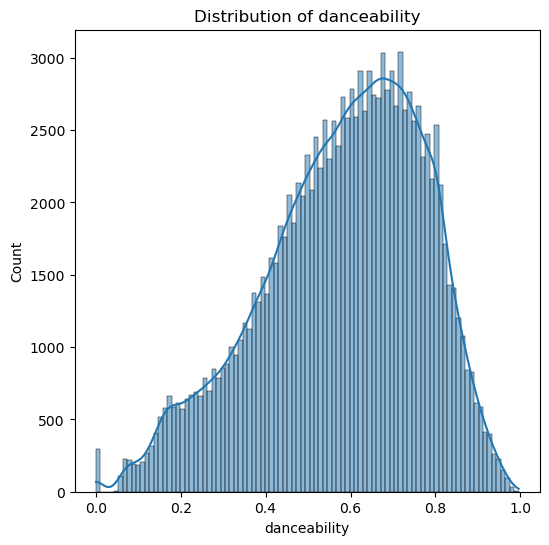

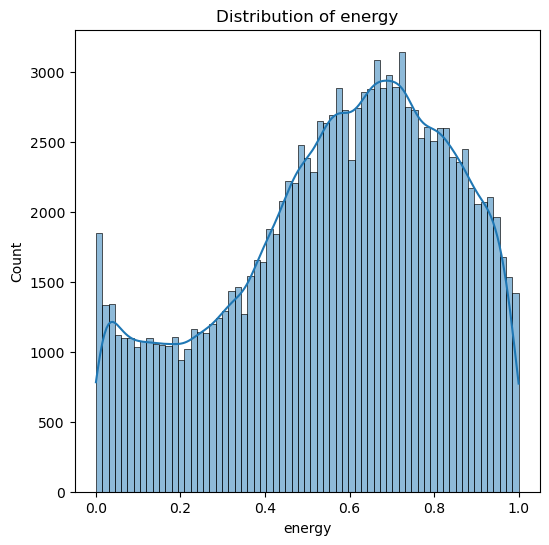

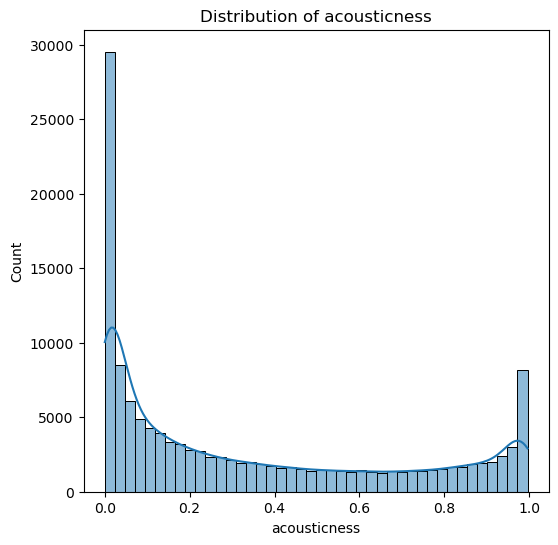

In [24]:
features=["danceability", "energy", "acousticness"]
for col in features:
    plt.figure(figsize=(6,6))
    sns.histplot(df_main[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

- From the figures, we see that the distribution of danceability and energy are right-skewed, which means a larger number of song tracks are danceable. Many tracks have high-energy indications fast upbeat or loud rhythms.

- Acousticness ranges from 0 to 1. 0 means very electronic, 1 means acoustic. The distibution fo the acousticness histogram shows that most of the tracks have a balanced note. 

We can also plot a kde plot to determine the shape of the acousticness distribution

C:\Users\shils\AppData\Local\Temp\ipykernel_20628\701443178.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_main["acousticness"], shade=True)


<Axes: xlabel='acousticness', ylabel='Density'>

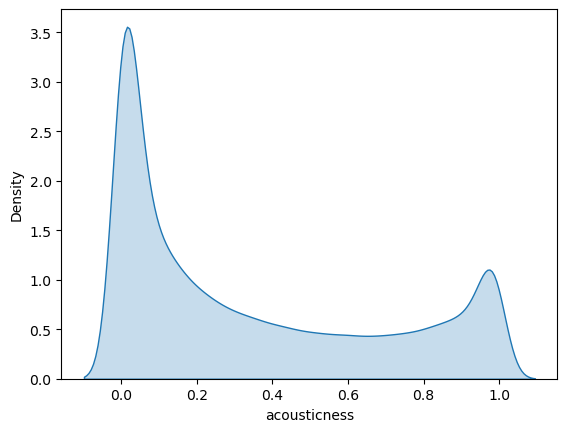

In [27]:
sns.kdeplot(df_main["acousticness"], shade=True)

- Correlation between audio features

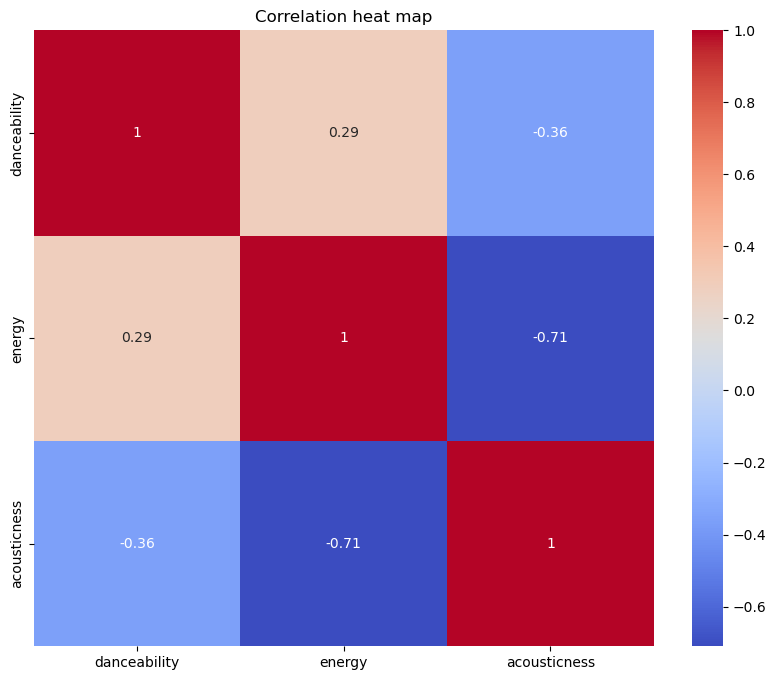

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation heat map")
plt.show()

- Energy and danceability are moderately correlated. It means not all the energetic songs are danceable
- Energy and Acousticness are weakly correlated. It means the songs can be low in energy but acoustics ( like slow ballads)

##### Are there any outliers in loudness, duration_ms, speechiness?

By plotting a box plot we can see the outliers if there are any

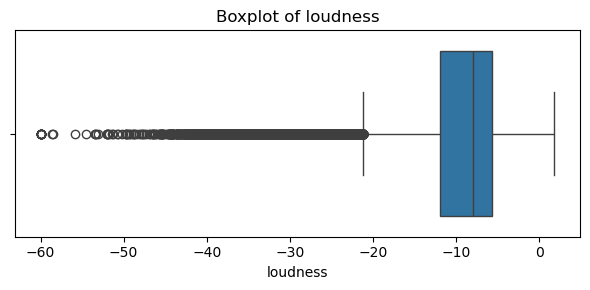

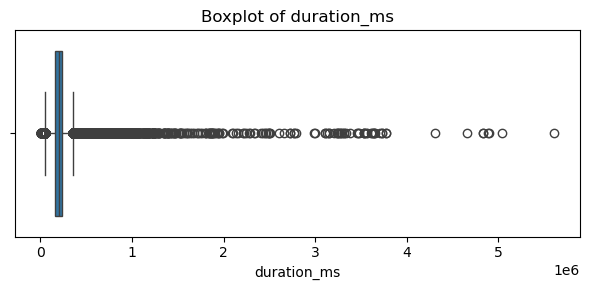

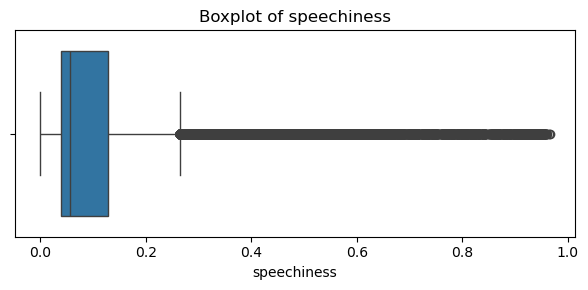

In [32]:
for col in ['loudness', 'duration_ms', 'speechiness']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_main[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.savefig(f'boxplot_{col}.png')
    plt.show() 

In [33]:
#Detect outliers numerically for loudness as an example
Q1 = df_main['loudness'].quantile(0.25)
Q3 = df_main['loudness'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_main[(df_main['loudness'] < Q1 - 1.5 * IQR) | (df_main['loudness'] > Q3 + 1.5 * IQR)]
print("Outliers in loudness:")
print(outliers[['track_name', 'artist_name', 'loudness']])


Outliers in loudness:
                             track_name         artist_name  loudness
44                             Reledaus          Mbo Mentho   -23.058
141                      舟歌 嬰ヘ長調, 作品 60     Frédéric Chopin   -24.190
142              スケルツォ 第 2番 変ロ長調, 作品 31     Frédéric Chopin   -21.512
143     練習曲, 作品 25 第 1番: 変イ長調 エオリアン・ハープ     Frédéric Chopin   -26.376
144            練習曲, 作品 25 第 9番: 変ト長調 蝶々     Frédéric Chopin   -22.099
...                                 ...                 ...       ...
130210                            Naima      Tommy Flanagan   -28.282
130219             The Space Between Us       Amaranth Cove   -21.433
130392                   Cherry Blossom   Tokyo Atmospheres   -22.086
130398                  Gelborn Heights              Guyara   -29.067
130617                 Hopes and Dreams  Emmanuelle Rimbaud   -28.427

[10215 rows x 3 columns]


-1.8039245018631538

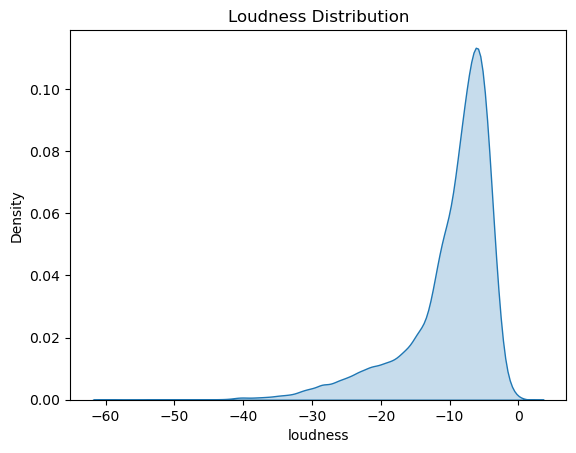

In [34]:
sns.kdeplot(df_main['loudness'], fill=True)
plt.title('Loudness Distribution')
df_main["loudness"].skew()

Such a large number of outliers means the distribution is heavily skewed as can be seen from the kde plot. The skew value of -1.80 means the distribution is left skewed with the tail on the left side. Most tracks are relatively loud with fewer tracks of lower values.

11.643587602056364


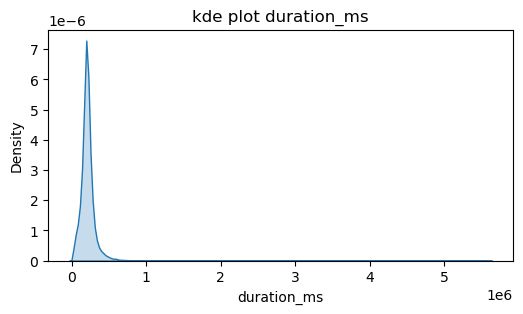

2.4855498923177506


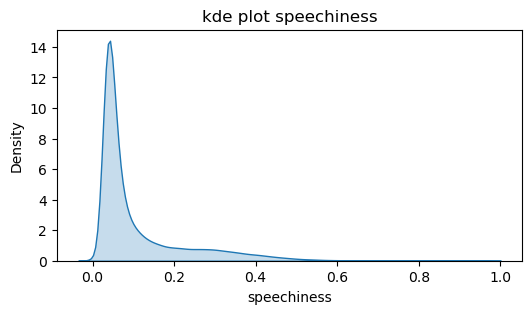

In [36]:
col=["duration_ms", "speechiness"]
for i in col:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(x=df_main[i], fill=True)
    plt.title(f'kde plot {i}') 
    print(df_main[i].skew())
    plt.show()     

- The above columns are right skewed
- Very few songs have a duration more than 1 millisecond

In [38]:
df_main[["energy", "loudness"]].corr()

,energy,loudness
energy,1.000000,0.766697
loudness,0.766697,1.000000


Energy and loudness shows a weak positive correlation which can be visualized by a regression plot

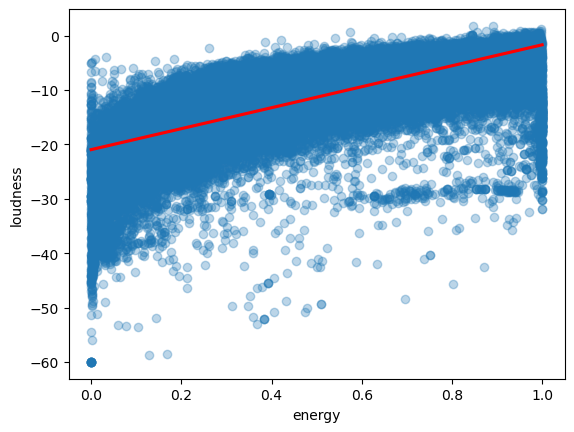

In [40]:
sns.regplot(x="energy", y="loudness", data=df_main, ci=95, scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.show()

#### Artist/Track Patterns

This section highlights the following analyses of the dataset as listed below.
- Which artist appears most frequently in the dataset?
- What are the top 10 most danceable track?
- Are certain artists most likely to produce high-energy or acoustic songs?

##### Which artist appears most frequently in the dataset?

In [44]:
df_main.head(3)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.0,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56


In [45]:
artist_counts = df_main['artist_name'].value_counts()
print(artist_counts)

artist_name
Johann Sebastian Bach      3621
Wolfgang Amadeus Mozart    1755
Armin van Buuren           1124
Ludwig van Beethoven        928
Frédéric Chopin             614
                           ... 
Mozaics                       1
Vanja Radovanović             1
Hounds                        1
CHIZZY JAY                    1
Saint Claire                  1
Name: count, Length: 34621, dtype: int64


We are interested in artists which appear more than one time in the dataset

In [47]:
repeated_artists = artist_counts[artist_counts > 1]
print(repeated_artists)


artist_name
Johann Sebastian Bach      3621
Wolfgang Amadeus Mozart    1755
Armin van Buuren           1124
Ludwig van Beethoven        928
Frédéric Chopin             614
                           ... 
Caro Emerald                  2
Bhumika Yadav                 2
Fast & Low Music              2
Trizz                         2
Huey Briss                    2
Name: count, Length: 15126, dtype: int64


The top 10 most famous artists are being picked up and will be visualized using a bar plot

In [49]:
artist_counts_df = df_main['artist_name'].value_counts().head(10).reset_index()
artist_counts_df.columns = ['artist_name', 'track_count']
print(artist_counts_df)

               artist_name  track_count
0    Johann Sebastian Bach         3621
1  Wolfgang Amadeus Mozart         1755
2         Armin van Buuren         1124
3     Ludwig van Beethoven          928
4          Frédéric Chopin          614
5           Claude Debussy          451
6             Image Sounds          369
7        Waka Flocka Flame          273
8   Los Cadetes De Linares          266
9          Antonio Vivaldi          254


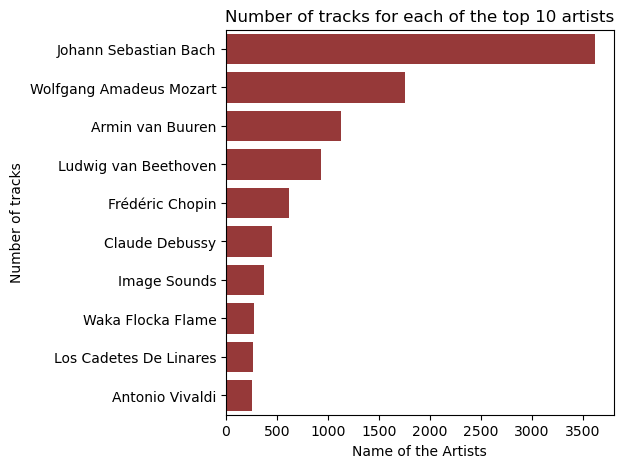

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(x="track_count", y="artist_name", data=artist_counts_df, color="brown")
plt.xlabel("Name of the Artists")
plt.ylabel("Number of tracks")
plt.title("Number of tracks for each of the top 10 artists")
plt.savefig
plt.show()

- Johann Sebastian Bach is the number one artist having the highest number of tracks approximately upto 3500

##### What are the top 10 most danceable tracks?

In [53]:
df_sorted = df_main.sort_values(by='danceability', ascending=False)
top_danceable_per_artist = df_sorted.drop_duplicates(subset='artist_name', keep='first')
top_10_danceable = top_danceable_per_artist[['artist_name', 'danceability']].head(10)
print(top_10_danceable)

              artist_name  danceability
35119          Louie Zong         0.996
23717        DJ Juan 9000         0.986
82706        Jean Tonique         0.986
66741   The Real Triple D         0.986
106124          Big Koola         0.986
68976              TÂCHES         0.986
2366                Dweeb         0.985
108369             Seelva         0.985
130180         ITSOKTOCRY         0.985
21912      De Sound Waves         0.985


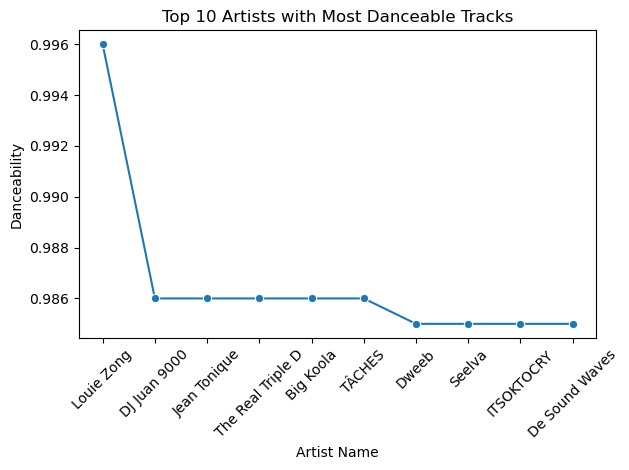

In [54]:
sns.lineplot(x='artist_name', y='danceability', data=top_10_danceable, marker='o')
plt.xticks(rotation=45)
plt.title('Top 10 Artists with Most Danceable Tracks')
plt.xlabel("Artist Name")
plt.ylabel("Danceability")
plt.tight_layout()
plt.show()

- Artist Louie Zong has the most danceable track among all the artists in the dataset
- The line plot shows artist DJ Juan 9000 and TACHES have the same danceability. It can be interpreted that they have almost the same genre of music and style.
- The same goes for danceability from Dweeb upto  De Sound Waves with a lesser danceability

##### Are certain artists most likely to produce high-energy or acoustic songs?

In [57]:
artist_features = df_main.groupby('artist_name')[['energy', 'acousticness']].mean().reset_index()
artist_features

,artist_name,energy,acousticness
0,!!!,0.6942,0.145301
1,"""Calendar Girls"" Original London Cast",0.3910,0.669000
2,"""Elena Of Avalor"" Cast",0.6230,0.306000
3,"""Puppy Dog Pals"" Cast",0.8000,0.124600
4,"""Weird Al"" Yankovic",0.7400,0.086100
...,...,...,...
34616,허니비,0.5370,0.538000
34617,홍단소녀,0.8720,0.133000
34618,훈남쓰,0.9050,0.070500
34619,ＮＯＳＴＲＡＤＡＭＵＳ,0.1490,0.972000


In [58]:
# Top 10 high-energy artists
top_energy_artists = artist_features.sort_values(by='energy', ascending=False).head(10)
print("Top 10 High-Energy Artists:")
print(top_energy_artists)

# Top 10 acoustic artists
top_acoustic_artists = artist_features.sort_values(by='acousticness', ascending=False).head(10)
print("\nTop 10 Acoustic Artists:")
print(top_acoustic_artists)


Top 10 High-Energy Artists:
                                             artist_name  energy  acousticness
21797  Nature Sounds Relaxation: Music for Sleep, Med...  1.0000      0.967000
28178                    Sounds Of Rain & Thunder Storms  1.0000      0.137000
21792                                  Nature Recordings  1.0000      0.217000
24672                          Rain Sounds Factory STHLM  1.0000      0.252333
28177              Sounds Of Nature : Thunderstorm, Rain  1.0000      0.420000
2871                                Background Noise Lab  1.0000      0.986000
10498                                      Forest Sounds  1.0000      0.617500
21798             Nature Sounds for Sleep and Relaxation  1.0000      0.451000
16123                                      Kent Whitaker  1.0000      0.000008
31072                                         Torrential  0.9995      0.642000

Top 10 Acoustic Artists:
                                             artist_name    energy  \
27437  

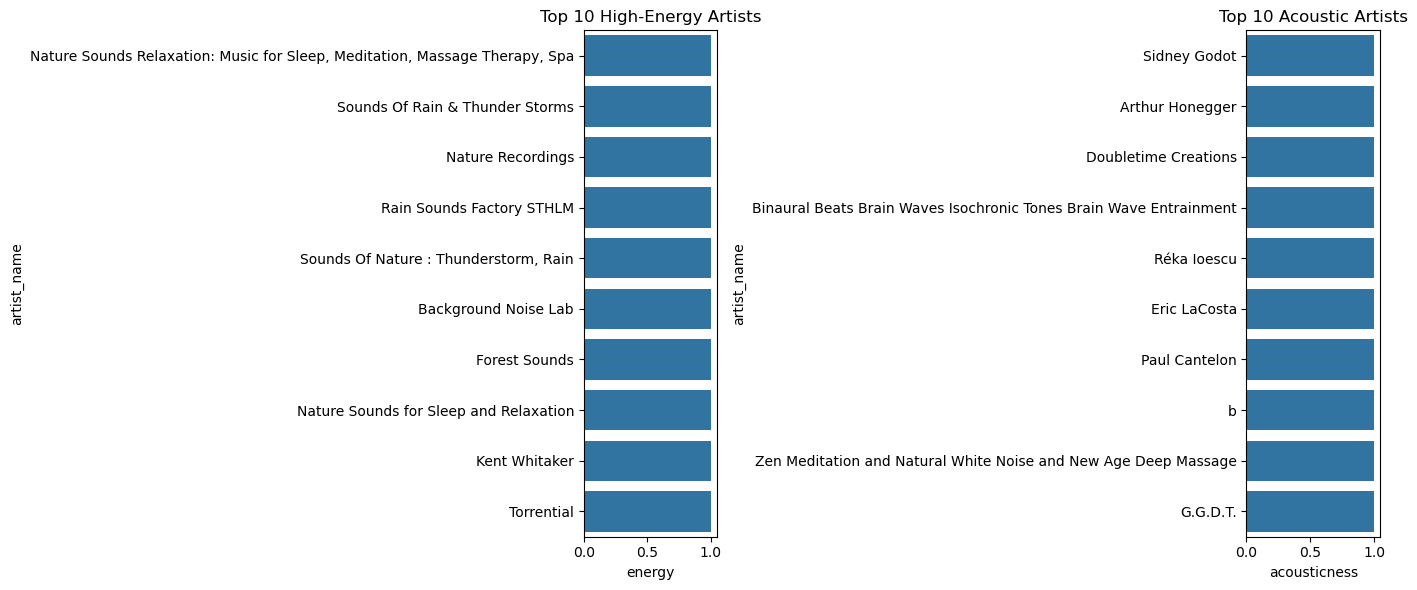

In [59]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot high-energy artists
sns.barplot(x='energy', y='artist_name', data=top_energy_artists, ax=axes[0])
axes[0].set_title('Top 10 High-Energy Artists')

# Plot high-acousticness artists
sns.barplot(x='acousticness', y='artist_name', data=top_acoustic_artists, ax=axes[1])
axes[1].set_title('Top 10 Acoustic Artists')

plt.tight_layout()
plt.show()

#### Statistical Analysis

##### Sampling and Distribution

- Taking a random sample of 100 tracks. Is the sample mean energy close to the population mean?  
- Comparing the distribution of sample means for energy by running repeated sampling (simulating Central Limit Theorem)

###### Taking a random sample of 100 tracks. Is the mean energy close to the population mean?

- n: We are sampling from 100 tracks, so our sample size is 100.
- replace: For the purpose of our work, we will sample with replacement.
- random state: Choosing an arbitary number for our random seed. 

In [65]:
sampled_data= df_main.sample(n=100, replace=True, random_state=31208)
sampled_data

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
9831,Henry Green,7xZTRF8rfFpSTEPEBE56wR,Aiir,0.756000,0.436,194893,0.432,0.251000,7,0.0924,-12.921,0,0.0389,113.559,4,0.0733,35
113492,Johann Sebastian Bach,1u3S4UZ5bfanMRoP7GUiD1,"2-Part Inventions: No. 7 in E Minor, BWV 778",0.990000,0.386,103800,0.124,0.945000,4,0.0957,-27.489,0,0.0543,118.306,4,0.1320,13
72915,Dizzy Fae,2LbWz9MwEa9RDVLN2zG2eK,Kosmic Luv,0.050800,0.844,138750,0.485,0.000002,1,0.0764,-7.517,0,0.0720,92.264,4,0.3360,27
23401,Isaac Joel Karns,6aBvZBxO8FuB5j6T5Diz5V,Alcyonium Palmatum,0.995000,0.294,31000,0.153,0.947000,1,0.1190,-23.947,1,0.0414,66.113,4,0.0521,0
109238,Deaf Havana,2k3IohY9s4B3uxA0tehRjb,Sinner,0.026900,0.553,207010,0.924,0.000000,3,0.8080,-3.024,1,0.1170,104.028,4,0.5370,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19116,Tadoe,2pg4jzB4l3EP3fjk3D77Gj,P's,0.065800,0.649,195390,0.644,0.000000,1,0.1450,-5.187,1,0.2470,148.078,4,0.3600,23
20215,Flock The Ocean,2naA3ygOHIbyWK5crAmSPe,Locked,0.884000,0.629,93621,0.363,0.836000,2,0.1060,-15.927,1,0.0332,120.019,4,0.8000,0
68486,3G,39uXnro2NwsOClMcSFl0Hv,Classics in My Classes,0.222000,0.828,313271,0.357,0.000000,5,0.1220,-9.604,1,0.2240,137.998,4,0.4770,7
42707,Asking Alexandria,2vS78fhFZTaoPWbP4TXVpY,Into The Fire,0.000578,0.384,237820,0.983,0.000043,8,0.3060,-2.239,0,0.1870,174.955,4,0.3580,25


In [66]:
# Computing the sample mean
estimate1=sampled_data["energy"].mean()
estimate1

0.5687454

The sample mean for the random sample is about 53.54%. This is a point estimate of the population mean based on our random sample of 100 audio tracks. The population mean is the mean for all the Spotify audio tracks. Due to sampling variability, the sample mean is usually not exactly the same as the population mean. 

We can find another sample mean based on another random sample of 100 audio tracks. . This mean new variable is called estimate2. 

In [68]:
estimate2=df_main["energy"].sample(n=100, replace=True, random_state=56810).mean()
estimate2

0.555292

The mean of our sampling distribution is 55.52%. '

###### Comparing the distribution of sample means for energy by running repeated sampling (simulating Central Limit Theorem)

Now we are computing the sampling distribution of 10,000 samples by using a for loop

In [72]:
estimate_list=[]
for i in range(10000):
    estimate_list.append(df_main["energy"].sample(n=100, replace=True).mean())
estimate_df=pd.DataFrame(data={"estimate": estimate_list})

In [73]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

0.5698240516126001

In [74]:
population_mean=df_main["energy"].mean()
population_mean

0.5691971953743244

The mean of our sampling mean is 56.92% which is approximately identical to the population mean, which is about 56.919%

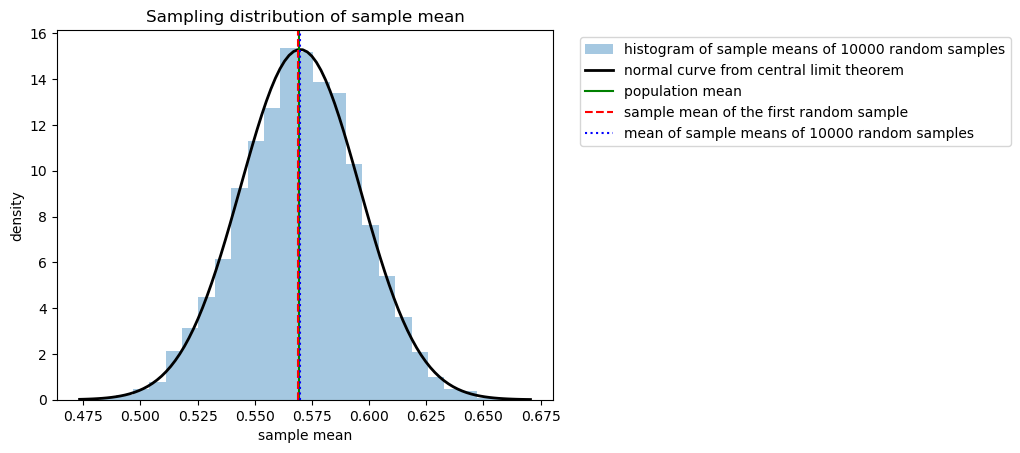

In [76]:
plt.hist(estimate_df["estimate"], bins=25, density=True, alpha=0.4, label="histogram of sample means of 10000 random samples")
xmin, xmax=plt.xlim()
x=np.linspace(xmin, xmax, 100)
p=stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df["estimate"]))
plt.plot(x, p, "k", linewidth=2, label="normal curve from central limit theorem")
plt.axvline(x=population_mean, color="g", linestyle="solid", label="population mean")
plt.axvline(x=estimate1, color="r", linestyle="--", label="sample mean of the first random sample")
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.savefig
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

- The central limit theorem states that the histogram almost follows a normal distribution. The outline of the histogram follows a normal curve.
- The mean of the sampling distribution of 10000 samples overlaps with the population mean (green solid line). These shows that these two are almost equal to each other.
- The sample mean of our first estimate of 100 aurido tracks, the red dashed line is also overlapping on the population mean showing the means are almost identical and less sample variability.

##### Confidence Intervals (CI)

- What is the 95% CI for the mean danceability of all songs?
- What is the 95% CI for the mean danceability of 100 songs?
- What is the CI for the average energy of 100 songs longer than 4 minutes?

###### What is the 95% CI for the mean danceability of all songs?

The steps for constructing a CI are:
- Identify a sample statistic
- Choose a confidence level
- Find the margin of error
- Calculate the interval

We can construct the confidence interval using scipy.stats.norm.interval(). This function inludes the following arguments:
- alpha: The CL
- loc: the sample mean
- scale: The sample standard error. 

In [83]:
population_mean

0.5691971953743244

In [84]:
estimated_standard_error=df_main["danceability"].std()/np.sqrt(df_main.shape[0])
estimated_standard_error

0.0005258425339760246

In [85]:
stats.norm.interval(0.95, loc=population_mean, scale=estimated_standard_error)

(0.5681665629461922, 0.5702278278024567)

we have a 95% CI for the mean danceability of audio tracks in the range (56.81, 57.02)

###### What is the 95% CI for the mean danceability of 100 songs?

In [88]:
estimate1 #which is our sample mean calculated previously

0.5687454

In [89]:
sampled_data #Which is our sampled data

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
9831,Henry Green,7xZTRF8rfFpSTEPEBE56wR,Aiir,0.756000,0.436,194893,0.432,0.251000,7,0.0924,-12.921,0,0.0389,113.559,4,0.0733,35
113492,Johann Sebastian Bach,1u3S4UZ5bfanMRoP7GUiD1,"2-Part Inventions: No. 7 in E Minor, BWV 778",0.990000,0.386,103800,0.124,0.945000,4,0.0957,-27.489,0,0.0543,118.306,4,0.1320,13
72915,Dizzy Fae,2LbWz9MwEa9RDVLN2zG2eK,Kosmic Luv,0.050800,0.844,138750,0.485,0.000002,1,0.0764,-7.517,0,0.0720,92.264,4,0.3360,27
23401,Isaac Joel Karns,6aBvZBxO8FuB5j6T5Diz5V,Alcyonium Palmatum,0.995000,0.294,31000,0.153,0.947000,1,0.1190,-23.947,1,0.0414,66.113,4,0.0521,0
109238,Deaf Havana,2k3IohY9s4B3uxA0tehRjb,Sinner,0.026900,0.553,207010,0.924,0.000000,3,0.8080,-3.024,1,0.1170,104.028,4,0.5370,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19116,Tadoe,2pg4jzB4l3EP3fjk3D77Gj,P's,0.065800,0.649,195390,0.644,0.000000,1,0.1450,-5.187,1,0.2470,148.078,4,0.3600,23
20215,Flock The Ocean,2naA3ygOHIbyWK5crAmSPe,Locked,0.884000,0.629,93621,0.363,0.836000,2,0.1060,-15.927,1,0.0332,120.019,4,0.8000,0
68486,3G,39uXnro2NwsOClMcSFl0Hv,Classics in My Classes,0.222000,0.828,313271,0.357,0.000000,5,0.1220,-9.604,1,0.2240,137.998,4,0.4770,7
42707,Asking Alexandria,2vS78fhFZTaoPWbP4TXVpY,Into The Fire,0.000578,0.384,237820,0.983,0.000043,8,0.3060,-2.239,0,0.1870,174.955,4,0.3580,25


In [90]:
estimated_standard_error2=sampled_data["danceability"].std()/np.sqrt(sampled_data.shape[0])
estimated_standard_error2

0.019384598280724072

In [91]:
stats.norm.interval(0.95, loc=estimate1, scale=estimated_standard_error2)

(0.5307522855150038, 0.6067385144849962)

The confidence level is (53.07, 60.67)

- Constructing the 99% CI

In [94]:
stats.norm.interval(0.99, loc=estimate1, scale=estimated_standard_error2)

(0.5188139837109873, 0.6186768162890126)

We have the 99% cI for the 100 audio tracks which stretches from 51.88% to 61.86%.
99% CI: (51.88, 61.86)

- Relationship between CL and CI

###### What is the CI for the average energy of songs longer than 4 minutes?

In [98]:
df_main.head(2)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.409,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.457,159.009,4,0.371,0


In [99]:
long_songs_df=df_main[df_main["duration_ms"]>240000].copy()

In [100]:
long_songs_df['duration_min'] = long_songs_df['duration_ms'] / 60000

In [101]:
long_songs_df

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,duration_min
41,Mr Little Jeans,3Z78Hd9B1OndIo7XJajwYR,Forgetter,0.125000,0.821,254122,0.512,0.007030,5,0.0879,-7.138,0,0.0596,128.035,4,0.5430,28,4.235367
50,Snow Patrol,0aYzQjr1hq0qJwp45diy5M,Heal Me,0.122000,0.552,241160,0.789,0.000005,9,0.0874,-5.449,1,0.0242,93.938,4,0.3490,53,4.019333
56,Trevor Hall,5iz6oTqd2Xu0FLdTwom6mK,Free,0.774000,0.523,258255,0.615,0.000020,0,0.3650,-8.136,1,0.0361,95.087,4,0.6370,42,4.304250
57,Lake Street Dive,5eyPkSDWFQNnnkZhFfE6Yo,Good Kisser - Recorded at Spotify Studios NYC,0.167000,0.570,245596,0.556,0.000000,10,0.0868,-8.139,1,0.0894,158.153,4,0.6910,38,4.093267
68,Armin van Buuren,5DmhuZg7dwVaA0XUlxxVVu,Our Origin (ASOT 874) [Tune Of The Week],0.000129,0.372,440952,0.813,0.937000,9,0.2890,-11.142,0,0.0327,131.999,4,0.1180,27,7.349200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130642,Kadhja Bonet,70j5IpLhG6klLJtTpYXUss,Second Wind,0.722000,0.314,248388,0.418,0.000007,1,0.1050,-7.855,0,0.0356,147.909,4,0.3070,46,4.139800
130647,Architects,0N3v9DoY1GaOoWaEKnxAUZ,A Wasted Hymn,0.000060,0.486,274933,0.924,0.000389,6,0.2970,-4.436,0,0.0446,121.036,4,0.0896,44,4.582217
130649,Coldplay,1aZhbOdRqshLS6uPjiO8Y4,The Scientist - Live In Buenos Aires,0.105000,0.294,388600,0.652,0.001960,5,0.3780,-7.314,1,0.0336,75.335,4,0.1670,64,6.476667
130651,Ñejo,4ZtSifmVEda37YUYnnHz1y,Se Te Hizo Tarde,0.319000,0.698,358765,0.801,0.000000,10,0.3160,-5.746,0,0.0639,169.995,4,0.9050,62,5.979417


In [102]:
sampled_mean_songs=long_songs_df.sample(n=100,  replace=True, random_state=48294)
sampled_mean_songs

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,duration_min
116920,Arthur Fleck,1rW2olDSFuyj1nrMGZqhEY,Who Is Arthur Fleck,0.000299,0.496,308428,0.79300,0.00000,6,0.0767,-6.314,1,0.0617,139.722,4,0.3970,9,5.140467
39899,Ludwig van Beethoven,2mi7emHDwWN2ktAJfPeScC,"Piano Sonata No. 29 In B Flat Major, Op. 106 -...",0.991000,0.293,981307,0.00971,0.94100,2,0.1110,-29.225,1,0.0501,71.564,3,0.0369,24,16.355117
77668,The Trews,2j81hO4Mteagmv7SBDj6U1,Gone to My Head - Den of Thieves Outtake,0.000028,0.441,287173,0.87700,0.00106,9,0.8010,-3.762,1,0.0383,152.050,4,0.6050,4,4.786217
121099,Ari Lennox,6u1sN2DFrKZBDdkdb1L76X,Whipped Cream,0.548000,0.744,291210,0.38300,0.00000,6,0.0966,-10.085,0,0.0309,85.024,4,0.5740,66,4.853500
30803,Jerry Garcia Band,20xsbQdxkEXTn73DdALPAR,Tough Mama - Live,0.261000,0.475,316411,0.86000,0.16100,11,0.3650,-6.383,0,0.1060,107.038,4,0.7000,29,5.273517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111881,R.E.M.,2zIZyLUbl2gxljDKo5JpCi,"Sweetness Follows - Live From Pyramid Stage, G...",0.480000,0.243,350680,0.44100,0.52100,7,0.8570,-12.916,1,0.0317,134.107,4,0.2930,21,5.844667
44874,Dub Equis,0rfjT1rjOeusIJ8T4OVlcV,Gnossienne,0.560000,0.521,246160,0.34500,0.90300,4,0.0881,-10.575,0,0.0536,172.956,4,0.0984,22,4.102667
61483,Substance Variant,1oTeRCnHlKycCca4R3Ai3B,Hanging (David Thulin Remix),0.083400,0.458,386133,0.79600,0.00284,3,0.0842,-5.536,1,0.0426,139.931,4,0.1530,6,6.435550
7562,Teenage Wrist,2rJs5L8S6ivX0Bhk1snhUm,Dweeb,0.000002,0.383,263029,0.79500,0.74100,10,0.3080,-4.175,0,0.0488,120.036,4,0.3200,39,4.383817


In [103]:
sample_mean_2=sampled_mean_songs["duration_min"].mean()
sample_mean_2

5.463543666666667

In [104]:
estimated_standard_error3=sampled_mean_songs["duration_min"].std()/np.sqrt(sampled_mean_songs.shape[0])
estimated_standard_error3

0.18926647977784145

In [105]:
stats.norm.interval(0.95, loc=sample_mean_2, scale=estimated_standard_error3)

(5.0925881828214195, 5.834499150511915)

#### Hypothesis Testing

- Do tracks with high speechiness (eg. rap songs) have significantly lower acousticness than others?
- Do songs with key == 0 (C major or minor) have different average energy than those in key == 7 (G)?

###### Do tracks with high speechiness (eg. rap songs) have significantly lower acousticness than others?

First we will state the null (H$_o$) and the alternate (H$_a$) hypotheses. 
- H$_o$= There is no difference in acousticness between the two groups of audio tracks
- H$_a$= There is a difference in acousticness between the two groups of audio tracks. 

In [170]:
high_speech=df_main[df_main["speechiness"]>0.66]["acousticness"]
low_speech=df_main[df_main["speechiness"]<=0.66]["acousticness"]
high_sample=high_speech.sample(n=100, random_state=1)
low_sample=low_speech.sample(n=100, random_state=1)

- if the P-value is less than the significance lvele of 0.05 or 5%, then we can conclude there are significance differences in acousticness between the two groups of audio tracks
- if the P-value is more or greater than the significance level, we can conclude there is not a statistically significant difference in the acousticness between the two groups of audio tracks.

In [172]:
t_test, p_val=stats.ttest_ind(high_sample, low_sample, equal_var=False, alternative="less")
print(f"T-statistic:{t_test}")
print(f"P-value:{p_val}")

T-statistic:3.1358875521240477
P-value:0.9990127727427282


In [195]:
if p_val < 0.05:
    print("The null hypothesis is rejected")
else:
    print("Fail to reject the null hypothesis: no significance difference in the acousticness")

Fail to reject the null hypothesis: no significance difference in the acousticness


###### Do songs with key == 0 (C major or minor) have different average energy than those in key == 7 (G)?

- H$_o$= The songs with key==0 do not have different average energy than those in key==7
- H$_a$=The songs with key==0 have different average energy than those in key==7

In [188]:
key_zero=df_main[df_main["key"]==0]['energy']
key_seven=df_main[df_main["key"]==7]['energy']
key_c=key_zero.sample(n=100, random_state=1)
key_g=key_seven.sample(n=100, random_state=1)
t_test1, p_val1=stats.ttest_ind(key_c, key_g, equal_var=False, alternative="less")
print(f"T-statistic:{t_test1}")
print(f"P-value:{p_val1}")

T-statistic:0.7911304103768623
P-value:0.7850917933601691


In [197]:
if p_val1 < 0.05:
    print("The null hypothesis is rejected")
else:
    print("Fail to reject the null hypothesis: no significance difference in the energies")

Fail to reject the null hypothesis: no significance difference in the energies
